In [ ]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Wed Dec 15 22:13:58 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 495.44       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   39C    P0    27W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('Not using a high-RAM runtime')
else:
  print('You are using a high-RAM runtime!')

Your runtime has 54.8 gigabytes of available RAM

You are using a high-RAM runtime!


In [ ]:
import sys
sys.path.append('/content/gdrive/')

In [ ]:
from google.colab import drive

drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [ ]:
import os

In [ ]:
training_1="/Training Data-01/Training Data-01/Sensor/"
plc_1="/Training Data-01/Training Data-01/PLC/"

In [ ]:
import pandas as pd
from os.path import exists

In [ ]:
main_path="/content/gdrive/MyDrive/COEN 4890 Final"

In [ ]:
sensor1_data = pd.DataFrame()
bad_list=[]
csv_length=[]
for i in range(48):
  path_to_file = main_path + training_1 + str(1+i) + '.csv'

  if exists(path_to_file):
    #print("True")
    training_data = pd.read_csv(path_to_file)
    csv_length.append(len(training_data))
    training_data['csv_no'] = i+1
    sensor1_data=sensor1_data.append(training_data, ignore_index=True)
  else:
    bad_list.append(i+1)


In [ ]:
csv_length

[1548800,
 1548800,
 1548800,
 1548800,
 1536000,
 1548800,
 1548800,
 1548800,
 1548800,
 1548800,
 1548800,
 1548800,
 652800,
 1548800,
 1548800,
 1548800,
 1548800,
 1548800,
 1536000,
 1548800,
 1548800,
 1548800,
 1548800,
 1548800,
 1536000,
 1548800,
 1548800,
 1548800,
 1548800,
 1548800,
 1548800,
 1536000,
 1548800,
 1548800,
 1548800,
 1548800,
 1548800,
 1536000,
 1548800,
 1548800,
 1548800,
 1548800,
 1548800,
 1548800,
 1548800,
 1548800,
 1548800]

In [ ]:
plc_data=pd.read_csv(main_path+plc_1+'plc.csv')

In [ ]:
plc_data

,time,spindle_load,x,y,z,csv_no
0,11:28:07:127,0.082400,-20.9572,-17.6915,-89.6468,1
1,11:28:07:137,0.082400,-20.9572,-17.6915,-89.6468,1
2,11:28:07:147,0.082400,-20.9572,-17.6915,-89.6468,1
3,11:28:07:157,0.082400,-20.9572,-17.6915,-89.6468,1
4,11:28:07:167,0.082400,-20.9572,-17.6915,-89.6468,1
...,...,...,...,...,...,...
110022,16:28:59:803,0.006104,-1.1088,-201.1264,-86.2070,48
110023,16:28:59:813,0.006104,-1.1088,-201.1264,-86.2070,48
110024,16:28:59:973,0.006104,-1.1088,-201.1264,-86.2070,48
110025,16:28:59:983,0.006104,-1.1088,-201.1264,-86.2070,48


In [ ]:
result_df = plc_data.drop_duplicates(keep='last',ignore_index=True)


In [ ]:
result_df

,time,spindle_load,x,y,z,csv_no
0,11:28:07:127,0.082400,-20.9572,-17.6915,-89.6468,1
1,11:28:07:137,0.082400,-20.9572,-17.6915,-89.6468,1
2,11:28:07:147,0.082400,-20.9572,-17.6915,-89.6468,1
3,11:28:07:157,0.082400,-20.9572,-17.6915,-89.6468,1
4,11:28:07:167,0.082400,-20.9572,-17.6915,-89.6468,1
...,...,...,...,...,...,...
110022,16:28:59:803,0.006104,-1.1088,-201.1264,-86.2070,48
110023,16:28:59:813,0.006104,-1.1088,-201.1264,-86.2070,48
110024,16:28:59:973,0.006104,-1.1088,-201.1264,-86.2070,48
110025,16:28:59:983,0.006104,-1.1088,-201.1264,-86.2070,48


In [ ]:
len(plc_data[plc_data['csv_no']==1])

2045

In [ ]:
len(plc_data[plc_data['csv_no']==2])

2327

In [ ]:
# assumptions: 1 csv file takes 5 minutes; 240 minutes for 48 csv files
total_csv_time=1*60*1000 #milliseconds
time_per_row=total_csv_time/len(training_data)

In [ ]:
sensor1_data.head()

,vibration_1,vibration_2,vibration_3,current,csv_no
0,0.024189,-0.013899,0.045651,-31.837665,1
1,0.043586,-0.012801,0.027327,-32.089322,1
2,0.038096,-0.000727,0.029770,-31.975896,1
3,0.032973,-0.014143,0.050782,-32.031778,1
4,0.037608,-0.027193,0.064097,-31.946010,1


In [ ]:
sensor1_data.describe()

,vibration_1,vibration_2,vibration_3,current,csv_no
count,7.183360e+07,7.183360e+07,7.183358e+07,7.183360e+07,7.183360e+07
mean,3.159460e-02,inf,NaN,-6.044477e-01,2.430987e+01
std,2.285712e+00,inf,NaN,3.473669e+01,1.384334e+01
min,-2.333084e+01,-1.731969e+308,-1.682783e+308,-6.867473e+01,1.000000e+00
25%,-1.265071e+00,-1.106720e+00,-1.420746e+00,-3.464484e+01,1.200000e+01
50%,3.443649e-02,3.176286e-03,4.483549e-03,-3.930485e-01,2.400000e+01
75%,1.312839e+00,1.111365e+00,1.357883e+00,3.386200e+01,3.600000e+01
max,2.336519e+01,1.614959e+308,1.674493e+308,6.809106e+01,4.800000e+01


In [ ]:
normalized_df=(sensor1_data-sensor1_data.mean())/sensor1_data.std()

/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:47: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)


In [ ]:
import math

Fs = 0 # number of samples per second


BPFO =  95.0087198440758 [Hz]
BPFI =  131.6579468225909 [Hz]
BSF =  77.90856530396115 [Hz]


In [ ]:
train_features=sensor1_data.vibration_2.to_list()

In [ ]:
filtered_features=[]
for x in train_features:
  if 30>x>-30:
    filtered_features.append(x)
  else:
    filtered_features.append(0)


In [ ]:
len(filtered_features)

71833600

In [ ]:
import os
import scipy.io

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D

from sklearn.preprocessing import StandardScaler

In [ ]:
mean=np.mean(filtered_features)

In [ ]:
normal_train_features=[x-mean for x in train_features]

In [ ]:
tot_time_steps = len(train_features)
time_steps = np.linspace(0, (tot_time_steps/Fs) - (1/Fs),
                    num = tot_time_steps,
                    endpoint=False, retstep=False,
                    dtype=None, axis=0)
print("Time Series Array =", time_steps)

Time Series Array = [0.00000000e+00 3.90624995e-05 7.81249989e-05 ... 2.80599984e+03
 2.80599988e+03 2.80599992e+03]


In [ ]:
def frequency_domain_analysis(data, fs):
    N = len(data)
    Y = np.fft.fft(data)
    Y = Y/N
    freq = fs/2 *np.linspace(0,1,int(N/2),endpoint=True)
    amp = 2 * np.abs(Y[0:int(N/2)])
    amp[0] = amp[0]/2
    return freq, amp

In [ ]:
from scipy import signal, stats
from scipy.signal import hilbert, firwin, lfilter

In [ ]:
bandpass = firwin(256, [2500,5000], nyq=0.5*Fs,pass_zero=False)

In [ ]:
X_train.head()

In [ ]:
X_train.columns

In [ ]:
initialize_directory_1=[]

initialize_directory_1 = lfilter(bandpass, 1.0, filtered_features)

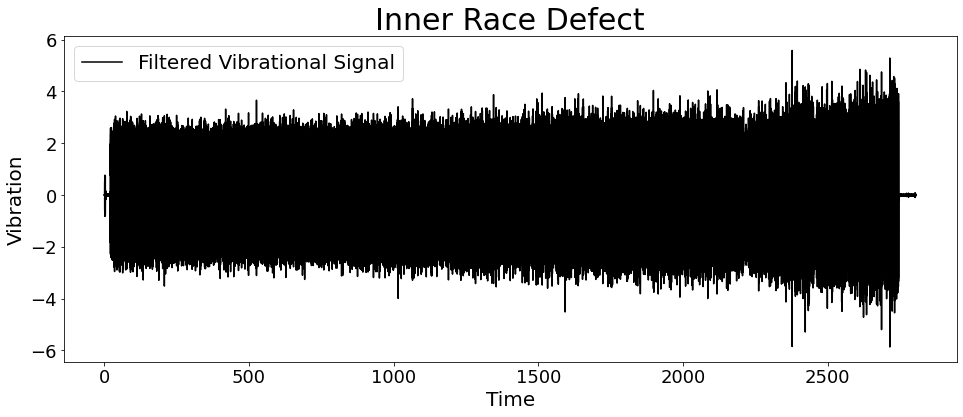

In [ ]:
plt.rcParams["legend.frameon"] = True
plt.rcParams['figure.figsize'] = [16, 6]

plt.plot(time_steps, initialize_directory_1, color = 'k', label='Filtered Vibrational Signal')

plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

plt.xlabel("Time", fontsize=20)
plt.ylabel("Vibration", fontsize=20)
plt.title("Inner Race Defect", fontsize=30)
plt.legend(fontsize=20)

plt.savefig('Signal2.png')
plt.show()

In [ ]:
# plt.rcParams["legend.frameon"] = True
# plt.rcParams['figure.figsize'] = [16, 6]

# plt.plot(time_steps, initialize_directory_1<1, color = 'k', label='Filtered Vibrational Signal')

# plt.xticks(fontsize=18)
# plt.yticks(fontsize=18)

# plt.xlabel("Time", fontsize=20)
# plt.ylabel("Vibration", fontsize=20)
# plt.title("Inner Race Defect", fontsize=30)
# plt.legend(fontsize=20)

# plt.savefig('Signal.png')
# plt.show()